In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(X[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [4]:
print(X[1].reshape(8,8))

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


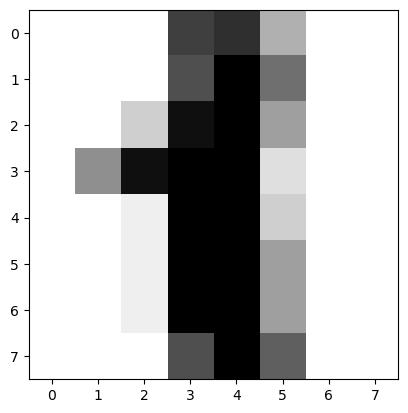

In [5]:
plt.figure()
plt.imshow(X[1].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### 12. Chaque chiffre est-il représenté en proportion égale ?

In [14]:
# M1
pd.DataFrame(y).value_counts()

0
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [15]:
#M2
for i in range(0,10):
    print('chiffre',i,sum(y==i))

chiffre 0 178
chiffre 1 182
chiffre 2 177
chiffre 3 183
chiffre 4 181
chiffre 5 182
chiffre 6 181
chiffre 7 179
chiffre 8 174
chiffre 9 180


Les classes sont équilibrées. Pas besoin de resampling.

In [16]:
from sklearn.model_selection import train_test_split

X_cv, X_test, y_cv, y_test = train_test_split(X,y,train_size=200)

200 est très petit pour un ensemble de train, mais dans ce contexte on prête beaucoup d'importance au set de test.

### 13. Validation croisée (7) du modèle kNN avec k=5

On fait une validation croisée uniquement sur l'ensemble cv de 200 données.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X_cv,y_cv,cv=7)

print(scores)

[0.82758621 0.93103448 0.89655172 0.86206897 0.92857143 0.96428571
 0.92857143]


In [20]:
# Score de la validation croisée :

np.mean(scores)

0.905524278676988

Maintenant, on avait pris 5 au hasard, donc on cherche quel est le meilleur k du kNN

In [24]:
from sklearn.model_selection import validation_curve
k_range = range(1,21)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_cv, y_cv, param_name="n_neighbors", param_range=k_range, cv=7)

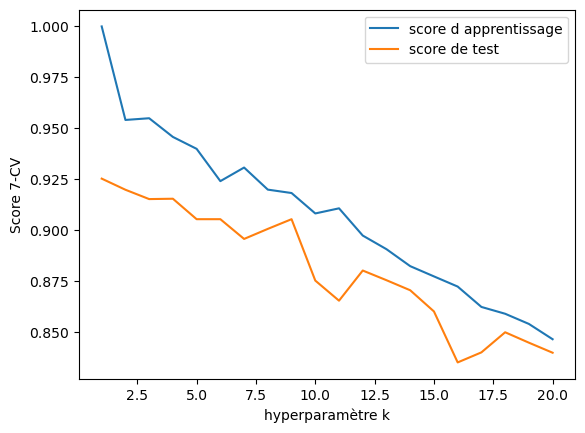

In [26]:
train_mean_score = np.mean(train_scores, axis=1)
valid_mean_score = np.mean(valid_scores, axis=1)

plt.plot(k_range, train_mean_score, label='score d apprentissage')
plt.plot(k_range, valid_mean_score, label='score de test')
plt.xlabel("hyperparamètre k")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()


Plus k est grand, moins le score est bon. On va donc plutot choisir un modele knn avec k=1

In [27]:
k_best = k_range[np.argmax(valid_mean_score)]
k_best

1

On souhaite, pour k = k best, tracer la courbe d’apprentissage correspondant a des tailles d’ ́echantillon d’apprentissage allant de 10 `a 150, et multiples de 5. Le code suivant donne les scores 7-CV correspondants.

Ici, la donnée est claire est pas continue. D'ou le fait que k=1

In [29]:
from sklearn.model_selection import learning_curve

train_size_range = range(10,151,5)
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors=k_best), X_cv, y_cv,train_sizes=train_size_range,cv=7)